# Oni Oluwasegun Yemi

# Project: Wrangling and Analyze Data

### About WE RATE DOGS :

The dataset that we will be wrangling for the sake of this project is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. 

Main tasks in this project are as follows:

1. Data wrangling, which consists of:

 - Gathering data
 - Assessing data
 - Cleaning data


2. Storing, analyzing, and visualizing the wrangled data


3. Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

### Importing needed dependencies

In [1]:
import os
import zipfile
import requests
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import glob
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#Importing the give dataset 
archived = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
archived.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
## Creating a new folder and the response library to fetch the data from the url
folder_name = 'image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

In [10]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [11]:
os.listdir(folder_name)

['image-predictions.tsv']

In [4]:
## Importing the Image dataset
image_prediction = pd.read_csv('./image_prediction/image-predictions.tsv', sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [332]:
## Scrapping the Twiiter rate dog archive site using the API tokens 
consumer_key = '############'
consumer_secret = '##################'
access_token = '#######################'
access_secret = '#####################'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df['tweet_id'].values
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.NotFound as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
        except tweepy.errors.Forbidden as f:
            print("Fail")
            fails_dict[tweet_id] = f
            pass
end = timer()
print(end - start)
print(fails_dict)



1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 302


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
11

Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
14

Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
16

Rate limit reached. Sleeping for: 324


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
20

Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
23

In [5]:
# Defining the tweet properties to be extracted  
tweet_prop= ['id','retweet_count', 'favorite_count']
## Creating an empty list
data = []
# Reading the text file ine by line

with open('tweet_json.txt', 'r') as file: 
    tweet_data = file.readline()
    while tweet_data:
        dict_json = json.loads(tweet_data)  ##converting the text file to json
        data_select = dict((tweet,dict_json[tweet]) for tweet in tweet_prop)
        data.append(data_select)
        tweet_data = file.readline()
    
            
# create DataFrame using the list created    
gathered_tweet = pd.DataFrame.from_dict(data)

#Check the head of the dataframe

gathered_tweet.head()

,id,retweet_count,favorite_count
0,892420643555336193,7003,33809
1,892177421306343426,5301,29324
2,891815181378084864,3478,22043
3,891689557279858688,7224,36926
4,891327558926688256,7757,35309


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Assessing the archived data programatically

In [7]:
# Using the info method
archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
#Describing all the numerical variables 
archived.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
##Obtaining the medain ratings
archived[['rating_numerator','rating_denominator']].median()

rating_numerator      11.0
rating_denominator    10.0
dtype: float64

<AxesSubplot:>

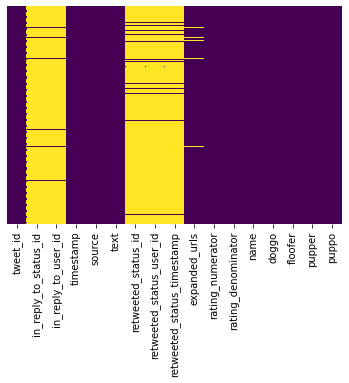

In [10]:
##Checking for missing values 
sns.heatmap(archived.isnull(),cbar = False, yticklabels=False, cmap='viridis')

* It can be observed that there are some missing values in the dataset as shown by the above heatmap

In [11]:
##Examining the count of tweet ratings denominator that is not equal to 10 
(archived['rating_denominator'] != 10).value_counts()

False    2333
True       23
Name: rating_denominator, dtype: int64

* It can be observed that there are some ratings that are either greater than 10 or not equals to 10 in the denominator ratings.

In [7]:
## Checking the index corresponding to denominator ratings not equals to zero 
index =archived[archived['rating_denominator'] != 10].index
index

Int64Index([ 313,  342,  433,  516,  784,  902, 1068, 1120, 1165, 1202, 1228,
            1254, 1274, 1351, 1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843,
            2335],
           dtype='int64')

In [9]:
## Looping through the index to get the text associated with the index
for i in index:
    print(archived.text[i],'\n','The denominator value extracted is :', archived.rating_denominator[i])

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho 
 The denominator value extracted is : 0
@docmisterio account started on 11/15/15 
 The denominator value extracted is : 15
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd 
 The denominator value extracted is : 70
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx 
 The denominator value extracted is : 7
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/… 
 The denominator value extracted is : 11
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE 
 The denominator value extracted is : 150
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP http

* It can be observed that some of the ratings that gave a denominator not equals to 10 are not valid.

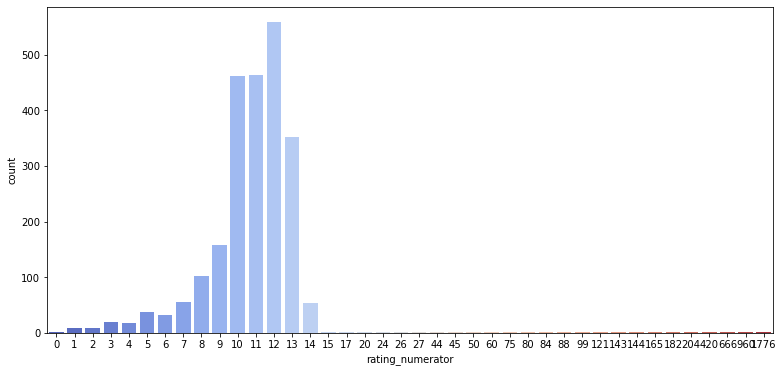

In [48]:
## Checking for outliers in ratings numerator
plt.figure(figsize=(13,6))
sns.countplot(x=archived['rating_numerator'], palette='coolwarm');

It can be obseved from the countplot above that there are outliers in the dog numerator ratings. according to the recent post https://www.pedestrian.tv/travel/what-to-do-boujee-hayman-island-holiday/, the highest rating over 10 is 15.

In [49]:
##Examining the count of tweet ratings numerator that is greater than 15 
(archived['rating_numerator'] > 15).value_counts()

False    2330
True       26
Name: rating_numerator, dtype: int64

In [82]:
def check(df):
    for i in df['text']:
        find = '(\d+\.\d+)\/(\d+)'
        output = re.search(find,i)
        if output!=None:
            index = df.loc[df['text']==i].index[0]
            text = df['text'][index]
            num= df['rating_numerator'][index]
            print('Index:', index,'\n',
                   'text:', text,'\n',
                    'numerator_rating:', num,'\n')

In [69]:
##Using the function on the specified columns
test = archived[['text','rating_numerator','rating_denominator']]
check(test)

Index: 45 
 text: This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948 
 numerator_rating: 5 

Index: 340 
 text: RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu… 
 numerator_rating: 75 

Index: 695 
 text: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS 
 numerator_rating: 75 

Index: 763 
 text: This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq 
 numerator_rating: 27 

Index: 1689 
 text: I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace 
 numerator_rating: 5 

Index: 1712 
 text: Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 htt

* It can be observed that there are decimals numerators rating but was worngly scrapped.

In [59]:
##trying to check the corresponding denominator rating for the outlier numerator ratings
archived[['rating_numerator','rating_denominator']][archived['rating_numerator'] > 15]

,rating_numerator,rating_denominator
55,17,10
188,420,10
189,666,10
290,182,10
313,960,0
340,75,10
433,84,70
516,24,7
695,75,10
763,27,10


In [80]:
##Cheking the name columns 
archived['name'].sample(15)

884      Sadie
1683        Bo
1306      None
2354         a
1936       one
977      Piper
969     Stewie
1371      None
201      Alice
1218    Curtis
1028       Gus
2162    Ronduh
2179    Tucker
544      Major
427       None
Name: name, dtype: object

In [61]:
## Assessing the total count of dogs with improper names like an, a, this,one etc
def improper_name(col):
    '''
    Function to count the total number of dog names contained in English stop-words
    '''
    name= []
    for i in col:
        if i in ENGLISH_STOP_WORDS:
            name.append(i)
    return name
    
    

In [132]:
##Printing the imporper names contained in the dog name column
len(improper_name(archived['name']))

87

In [127]:
##Counting the number of NONE in the name columns
(archived['name']=='None').value_counts()

False    1611
True      745
Name: name, dtype: int64

In [147]:
##Defining a function to count for None values in the dog stages 
def count_none(col, value):
    """This function returns the counts of number of None values in a variable"""
    count = 0
    for i in col:
        if i == 'None':
            count = count+1
    print(f'{value} has {count} None')

In [151]:
## Applying the function on the affected columns 
count_none(archived['puppo'],'puppo')
count_none(archived['pupper'],'pupper')
count_none(archived['floofer'], 'floofer')
count_none(archived['doggo'], 'doggo')

puppo has 2326 None
pupper has 2099 None
floofer has 2346 None
doggo has 2259 None


In [12]:
archived.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


In [196]:
## Writting function to assess the expanded urls column
def double_urls(col):
    """Writing a funtion that returns the rows with double urls"""
    new=col.dropna()
    a= new.str.contains(r',')
    return(new[a])

In [215]:
double_urls(archived['expanded_urls'])

4       https://twitter.com/dog_rates/status/891327558...
6       https://gofundme.com/ydvmve-surgery-for-jax,ht...
7       https://twitter.com/dog_rates/status/890729181...
10      https://twitter.com/dog_rates/status/890006608...
13      https://twitter.com/dog_rates/status/889638837...
                              ...                        
2084    https://twitter.com/dog_rates/status/670807719...
2205    https://twitter.com/dog_rates/status/668633411...
2209    https://twitter.com/dog_rates/status/668623201...
2259    https://twitter.com/dogratingrating/status/667...
2260    https://twitter.com/dogratingrating/status/667...
Name: expanded_urls, Length: 639, dtype: object

* It can be observed that there are 639 urls that are doubled 

In [222]:
## Writting a function that returns the the urls that does not correspond to twiiter ratings
def not_twitter_url(col):
    new = col.dropna()
    a = ~(new.str.contains(u'twitter.com/'))
    return(new[a])
    

In [221]:
not_twitter_url(archived['expanded_urls'])

310     https://vine.co/v/5W2Dg3XPX7a,https://vine.co/...
335     http://us.blastingnews.com/news/2017/02/jfk-an...
406     https://vine.co/v/5gKxeUpuKEr,https://vine.co/...
444     http://us.blastingnews.com/news/2017/01/200-do...
450     https://vine.co/v/5QWd3LZqXxd,https://vine.co/...
                              ...                        
1807                        https://vine.co/v/imJ0BdZOJTw
1818                        https://vine.co/v/eEQQaPFbgOY
1834                        https://vine.co/v/iZXg7VpeDAv
1916                        https://vine.co/v/i7nWzrenw5h
2212                        https://vine.co/v/ea0OwvPTx9l
Name: expanded_urls, Length: 107, dtype: object

* It can be observed that there are 107 total rows of urls that does not correspond to twitter rating

### Assessing the image_prediction dataset

In [223]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [224]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [84]:
##Writing a function to count the number of non dogs recognized
def count_dog(col, value):
    count = 0
    for i in col:
        if i==False:
            count+=1
    print(f'{value} = {count} no dog recognized')
            

In [87]:
## Using the fucntion on the three dogs image recognized 
count_dog(image_prediction['p1_dog'],'p1_dog')
count_dog(image_prediction['p2_dog'],'p2_dog')
count_dog(image_prediction['p3_dog'],'p3_dog')

p1_dog = 543 no dog recognized
p2_dog = 522 no dog recognized
p3_dog = 576 no dog recognized


In [103]:
##Checking the names in p1,p2,and p3
image_prediction[['p1','p2','p3']].head()

,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman


* It can be observed that there are inconsistencies in the naming case from the above output

### Assessing the Gathered tweet dataset

In [11]:
## Checking the information of gathered dataset
gathered_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [91]:
## finding the descriptive statistics
gathered_tweet.describe()

,id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2470.130640,7052.528148
std,6.820795e+16,4183.318308,10960.266545
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,493.500000,1225.000000
50%,7.178418e+17,1148.000000,3051.000000
75%,7.986547e+17,2860.500000,8602.000000
max,8.924206e+17,70705.000000,144841.000000


In [93]:
## checking the duplicated value
gathered_tweet.duplicated().sum()

0

In [94]:
##Checking the duplicated columns in the three datasets
all_columns = pd.Series(list(archived) + list(image_prediction) + list(gathered_tweet))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

### Quality issues

1. incorrect datatype, timestamp and tweet_id

2. inavlid dog name (dog name corresponding to english stopwords and None) 

3. To retain the original tweets: the non-null data in columns (in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_statud_timestamp") needs to be deleted or supressed 

4. inconsistencies in the naming of the dog breeds (pi, p2 and p3) 

5. Some denominator ratings are either above or less than 10  

6. some numerator ratings are outrageous, while some  are false (decimals) and not properly scrapped

7. A total of 639 double links are present within "expanded_urls" column data 

8. Incorrect urls (not correspodning to twitter ratings)

9. The source column contians some unecessaries html tags


### Tidiness issues
1. The variables doggo, floofer, pupper and puppo present in the image_prediction table, all represent one single variable and based on the tidyness rule, should be a part of a single column

2. All the three tables should be combined into one i.e a master dataframe.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [6]:
# Make copies of original pieces of data
archived_clean = archived.copy()
image_prediction_clean = image_prediction.copy()
gathered_tweet_clean = gathered_tweet.copy()

### Issue #1: The variables doggo, floofer, pupper and puppo present in the image_prediction table, all represent one single variable and based on the tidyness rule, should be a part of a single column

#### Define: Create a new column for the dog stages using and manually clean up rows with double dog stages entries

#### Code

In [7]:
## Write a function to include to generate a new column for the dog stages
def Stages(values):
    # Create an empty list
    lst = []
    # Setting the conditional
    if values['doggo'] == 'doggo':
        # Adding the entry to the list if it satisfies the condition
        lst.append('doggo')
    if values['floofer'] == 'floofer':
        lst.append('floofer')
    if values['pupper'] == 'pupper':
        lst.append('pupper')
    if values['puppo'] == 'puppo':
        lst.append('puppo')
    if len(lst) < 1: 
        values['stage'] = 'None'
    else: 
        values['stage'] = ' and '.join(lst)
    return values

In [8]:
# Applying the "Stages" function to the dataframe
archived_clean = archived_clean.apply(Stages, axis=1)

In [9]:
##dropping the prevoius unneeded dog stages
archived_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

In [25]:
## Cleeaning the rows where dogs had two stages
for i, j in archived_clean.iterrows():
    if ' and ' in j['stage']:
        print(i,j['stage'],'\n',j['text'],'\n')

191 doggo and puppo 
 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel 

200 doggo and floofer 
 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk 

460 doggo and pupper 
 This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7 

531 doggo and pupper 
 Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho 

565 doggo and pupper 
 Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze 

575 doggo and pupper 
 This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj 

7

In [10]:
## Manually correcting some of the double entry dog stages

archived_clean.loc[archived_clean.index == 200, 'stage'] ='floofer'
archived_clean.loc[archived_clean.index == 460, 'stage'] ='pupper'
archived_clean.loc[archived_clean.index == 575, 'stage'] ='doggo'
archived_clean.loc[archived_clean.index == 705, 'stage'] ='doggo'
archived_clean.loc[archived_clean.index == 956, 'stage'] =np.nan

#### Test 

In [28]:
archived_clean['stage'].value_counts()

None                1976
pupper               246
doggo                 85
puppo                 30
floofer               10
doggo and pupper       8
Name: stage, dtype: int64

### Issue #2: All the three tables should be combined into one i.e a master dataframe.

#### Define: Merge all the three datasets together using the tweet_id column 

#### Code

In [11]:
##Rename the id column in gathered_tweet to tweet_id for uniformity across dataframes
gathered_tweet_clean.rename(columns={'id':'tweet_id'}, inplace = True)
gathered_tweet_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7003,33809
1,892177421306343426,5301,29324
2,891815181378084864,3478,22043
3,891689557279858688,7224,36926
4,891327558926688256,7757,35309


In [12]:
##Combining all the three dataframes into one
combined_data= pd.merge(archived_clean,gathered_tweet_clean, how ='left', on='tweet_id')
combined_data = combined_data.merge(image_prediction_clean, how= 'left', on='tweet_id')

### Test 

In [31]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  stage                       2355 

### Issue #3: Incorrect data type; Timestamps and tweet_id 

#### Define: Convert the timestamps to date and the tweet_id to string 

#### Code

In [13]:
##Using the astype function to convert the two columns 
combined_data['timestamp'] = combined_data['timestamp'].astype('datetime64')
combined_data['tweet_id'] = combined_data['tweet_id'].astype('str')

### Test

In [35]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9424 entries, 0 to 9423
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    9424 non-null   object        
 1   in_reply_to_status_id       312 non-null    float64       
 2   in_reply_to_user_id         312 non-null    float64       
 3   timestamp                   9424 non-null   datetime64[ns]
 4   source                      9424 non-null   object        
 5   text                        9424 non-null   object        
 6   retweeted_status_id         724 non-null    float64       
 7   retweeted_status_user_id    724 non-null    float64       
 8   retweeted_status_timestamp  724 non-null    object        
 9   expanded_urls               9188 non-null   object        
 10  rating_numerator            9424 non-null   int64         
 11  rating_denominator          9424 non-null   int64       

### Issue #4: To retain the original tweets: the non-null data in columns (in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_statud_timestamp") needs to be deleted or supressed 

#### Define: Drop the Unneeded rows and columns 

#### Code

In [14]:
## Selecting the isnull rows that correspond to the targerted columns
combined_data=combined_data[combined_data['in_reply_to_status_id'].isnull()]
combined_data=combined_data[combined_data['retweeted_status_id'].isnull()]

In [15]:
## dropping the corresponding columns
combined_data.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                    'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [35]:
combined_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,7003.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,5301.0,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,3478.0,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,7224.0,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,7757.0,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Issue #5: inavlid dog name (dog name corresponding to english stopwords and None)

#### Define: All invalid dog names are lowercase, therefore, all lowercase names should be deleted 

#### Code

In [16]:
## Finding all the row with lowercase name which are invalid and deselecting it 
mask =combined_data.name.str.contains('^[a-z]', regex = True)
combined_data = combined_data[~mask]

In [17]:
## To remove the dog with None names 
combined_data= combined_data[combined_data.name!='None']

#### Test

In [38]:
## Searching for a lowercase or invalid dog name
mask =combined_data.name.str.contains('^[a-z]', regex = True)
combined_data[mask]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [39]:
## Searching for None in the cleaned column name
combined_data[combined_data.name=='None']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #6: Some denominator ratings are either above or less than 10

#### Define: Replace all denominator rating by the correct  rating from the extracted text 

#### Code 

In [18]:
for i,j in combined_data.iterrows():
    if j['rating_denominator']!=10:
        print(i, '\n',j['text'])

#combined_data['text'][combined_data['rating_denominator'] != 10]

516 
 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
1202 
 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1662 
 This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5


In [21]:
## Replacing the denominator manually
combined_data.loc[combined_data.index == 516, 'rating_denominator'] = np.nan
combined_data.loc[combined_data.index == 1202, 'rating_denominator'] = 10
combined_data.loc[combined_data.index == 1662, 'rating_denominator'] = 10

#### Test

In [22]:
combined_data[combined_data['rating_denominator']!=10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
516,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,NaN,Sam,None,1330.0,...,1.0,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True


### Issue #7: Some numerator ratings are outrageous, while some  are false (decimals) and not properly scrapped

#### Define: Replace the wrongly scrapped values and replace any other outrageous ratings with the median 

#### Code

In [23]:
## manually inputing the worngly scrapped numerator ratings
combined_data.loc[combined_data.index==45, 'rating_numerator'] = 13.5
combined_data.loc[combined_data.index==695, 'rating_numerator'] = 9.75
combined_data.loc[combined_data.index==763, 'rating_numerator'] = 11.27

In [24]:
## Replacing the numerator greater than 15 with the median
median_numerator = combined_data.rating_numerator.median()
mask = combined_data['rating_numerator'] > 10
column = 'rating_numerator'
combined_data.loc[mask,column] = median_numerator

#### Test

In [25]:
combined_data[combined_data['rating_numerator']>15]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #8: The source column contains html tags 

#### Define: use the strip function to remove the html tags

#### Code

In [26]:
## Using a lambda expression with mapping to remove the html tags 
combined_data['source'] = combined_data['source'].map(lambda x: x.lstrip('<a href=').rstrip('</a>'))

#### Test

In [27]:
combined_data['source'].head()

0    "http://twitter.com/download/iphone" rel="nofo...
1    "http://twitter.com/download/iphone" rel="nofo...
2    "http://twitter.com/download/iphone" rel="nofo...
3    "http://twitter.com/download/iphone" rel="nofo...
4    "http://twitter.com/download/iphone" rel="nofo...
Name: source, dtype: object

### Issue #9: A total of 639 double links are present within "expanded_urls" column data 


#### Define: Remove the second link in the expanded url colum

#### Code

In [28]:
## Locating the rows with multiples urls, iterate, split and obtain the first url
mask = combined_data['expanded_urls'].str.contains(r',')
column = 'expanded_urls'
for i in combined_data['expanded_urls'][combined_data['expanded_urls'].str.contains(r',')]:
    combined_data.loc[mask,column]= i.split(',')[0]

### Test

In [29]:
combined_data['expanded_urls'][combined_data['expanded_urls'].str.contains(r',')]

Series([], Name: expanded_urls, dtype: object)

### Issue #10:  Incorrect urls (not correspodning to twitter ratings)

#### Define: Filter out urls that does'nt conform to twitter real ratings

#### Code 

In [30]:
#using the search pattern to index urls that corresponds to twitter rating
combined_data = combined_data[combined_data['expanded_urls'].str.contains(u'twitter.com/')]

#### Test

In [31]:
combined_data.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
233,847842811428974592,2017-03-31 16:07:33,"""http://twitter.com/download/iphone"" rel=""nofo...","This is Rontu. He is described as a pal, cuddl...",https://twitter.com/dog_rates/status/668623201...,11.0,10.0,Rontu,None,1192.0,...,1.0,Bernese_mountain_dog,0.951337,True,Greater_Swiss_Mountain_dog,0.016849,True,Appenzeller,0.010849,True
1264,709918798883774466,2016-03-16 01:46:45,"""http://twitter.com/download/iphone"" rel=""nofo...",Meet Watson. He's a Suzuki Tickleboop. Leader ...,https://twitter.com/dog_rates/status/668623201...,11.0,10.0,Watson,None,995.0,...,2.0,Pembroke,0.956222,True,Cardigan,0.020727,True,Chihuahua,0.007912,True
1247,711652651650457602,2016-03-20 20:36:28,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Gary. He just wanted to say hi. 9/10 v...,https://twitter.com/dog_rates/status/711652651...,9.0,10.0,Gary,None,822.0,...,1.0,llama,0.856789,False,Arabian_camel,0.098727,False,neck_brace,0.016377,False
347,831911600680497154,2017-02-15 17:02:36,"""http://twitter.com/download/iphone"" rel=""nofo...",Meet Kuyu. He was trapped in a well for 10 day...,https://twitter.com/dog_rates/status/668623201...,11.0,10.0,Kuyu,None,5990.0,...,4.0,bloodhound,0.777562,True,Great_Dane,0.047418,True,Leonberg,0.017943,True
856,764259802650378240,2016-08-13 00:38:30,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Kota and her son Benedict. She doesn't...,https://twitter.com/dog_rates/status/668623201...,10.0,10.0,Kota,None,1393.0,...,1.0,German_shepherd,0.973677,True,malinois,0.025950,True,kelpie,0.000192,True
633,793845145112371200,2016-11-02 16:00:06,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Clark. He was just caught wearing pant...,https://twitter.com/dog_rates/status/793845145...,11.0,10.0,Clark,None,1747.0,...,1.0,Old_English_sheepdog,0.765277,True,Bedlington_terrier,0.112753,True,Kerry_blue_terrier,0.047662,True
1134,728653952833728512,2016-05-06 18:33:34,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Coleman. Somebody needs to tell him th...,https://twitter.com/dog_rates/status/668623201...,8.0,10.0,Coleman,None,948.0,...,2.0,window_shade,0.594333,False,studio_couch,0.053515,False,rotisserie,0.041248,False
153,862457590147678208,2017-05-11 00:01:27,"""http://twitter.com/download/iphone"" rel=""nofo...","This is Jersey. He likes to watch movies, but ...",https://twitter.com/dog_rates/status/668623201...,11.0,10.0,Jersey,None,4253.0,...,1.0,home_theater,0.496348,False,studio_couch,0.167256,False,barber_chair,0.052625,False
515,811386762094317568,2016-12-21 01:44:13,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Craig. That's actually a normal sized ...,https://twitter.com/dog_rates/status/811386762...,11.0,10.0,Craig,pupper,5980.0,...,1.0,Pembroke,0.804177,True,Cardigan,0.189890,True,beagle,0.001965,True
1541,689623661272240129,2016-01-20 01:41:08,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Lucy. She's terrified of the stuffed b...,https://twitter.com/dog_rates/status/668623201...,10.0,10.0,Lucy,pupper,581.0,...,1.0,toy_poodle,0.279604,True,mashed_potato,0.208564,False,Labrador_retriever,0.077481,True


### Issue #11:  inconsistencies in the naming of the dog breeds (p1, p2 and p3) 

#### Define: converts all dog breeds naming to lower case

#### Code

In [35]:
combined_data['p1'] = combined_data['p1'].str.lower()
combined_data['p2'] = combined_data['p2'].str.lower()
combined_data['p3'] = combined_data['p3'].str.lower()

#### Test 

In [38]:
combined_data[['p1','p2','p3']].head()

,p1,p2,p3
0,orange,bagel,banana
1,chihuahua,pekinese,papillon
2,chihuahua,malamute,kelpie
3,paper_towel,labrador_retriever,spatula
4,basset,english_springer,german_short-haired_pointer


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [39]:
combined_data.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [40]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [41]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,11.0,10.0,Phineas,None,7003.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,11.0,10.0,Tilly,None,5301.0,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,11.0,10.0,Archie,None,3478.0,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,11.0,10.0,Darla,None,7224.0,...,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/668623201...,11.0,10.0,Franklin,None,7757.0,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


### Insights:
1. Months with the highest retweet and favorite counts 

2. Top 10 dogs with highest total ratings and retweet

3. The retweet counts based on dog stages  

### Visualization

### Insight #1: Months with the highest retweet and favorite counts

#### Define: To obtain the months with the highest retweet and favorite counts using barplot

In [42]:
## Selecting the needed variables 
twitter_archive_master_counts = twitter_archive_master[['retweet_count','favorite_count', 'timestamp']]

In [43]:
## Creating a new column in the dataframe called date just to remove the time differences 
twitter_archive_master_counts['date'] = pd.to_datetime(twitter_archive_master['timestamp']).dt.date

<ipython-input-43-b0e0d5da4f1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_master_counts['date'] = pd.to_datetime(twitter_archive_master['timestamp']).dt.date


In [44]:
## To create a new column in the dataframe called time
twitter_archive_master_counts['time'] = pd.to_datetime(twitter_archive_master['timestamp']).dt.time

<ipython-input-44-a19be7438529>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_master_counts['time'] = pd.to_datetime(twitter_archive_master['timestamp']).dt.time


In [45]:
## Converting the date column into a string and creating a another column called year from it
twitter_archive_master_counts['date']= twitter_archive_master_counts.date.astype('str')
twitter_archive_master_counts['year'], twitter_archive_master_counts['month'], twitter_archive_master_counts['day'] = twitter_archive_master_counts['date'].str.split('-', 2).str

<ipython-input-45-5e5c2f524aba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_master_counts['date']= twitter_archive_master_counts.date.astype('str')
<ipython-input-45-5e5c2f524aba>:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  twitter_archive_master_counts['year'], twitter_archive_master_counts['month'], twitter_archive_master_counts['day'] = twitter_archive_master_counts['date'].str.split('-', 2).str
<ipython-input-45-5e5c2f524aba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [46]:
twitter_archive_master_counts.head()

,retweet_count,favorite_count,timestamp,date,time,year,month,day
0,7003.0,33809.0,2017-08-01 16:23:56,2017-08-01,16:23:56,2017,08,01
1,5301.0,29324.0,2017-08-01 00:17:27,2017-08-01,00:17:27,2017,08,01
2,3478.0,22043.0,2017-07-31 00:18:03,2017-07-31,00:18:03,2017,07,31
3,7224.0,36926.0,2017-07-30 15:58:51,2017-07-30,15:58:51,2017,07,30
4,7757.0,35309.0,2017-07-29 16:00:24,2017-07-29,16:00:24,2017,07,29


In [47]:
## Recoding the month variable from number like to strings 
twitter_archive_master_counts['month']=twitter_archive_master_counts['month'].replace({'01': 'Jan',
                                                '02': 'Feb',
                                                '03': 'Mar',
                                                '04': 'Apr',
                                                '05': 'May',
                                                '06':'Jun',
                                                '07':'Jul',
                                                '08':'Aug',
                                                '09':'Sept',
                                                '10':'Oct',
                                                '11':'Nov',
                                                '12':'Dec'})

<ipython-input-47-b970b4daba4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_master_counts['month']=twitter_archive_master_counts['month'].replace({'01': 'Jan',


In [48]:
## Performing a group by function based on time, date, month and day
bytime = twitter_archive_master_counts.groupby('time')
bydate = twitter_archive_master_counts.groupby('date')
bymonth = twitter_archive_master_counts.groupby('month')
byday = twitter_archive_master_counts.groupby('day')

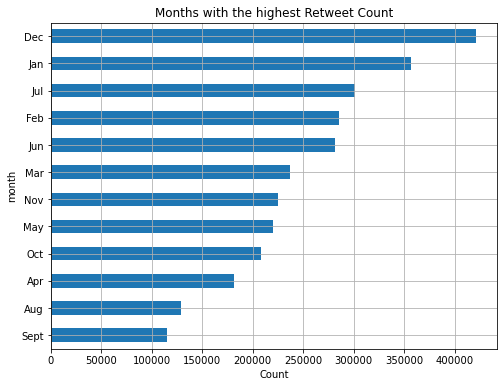

In [49]:
## Visulaizing the monthn with the highest retweet counts using barchart
plt.figure(figsize=[8,6])
bymonth.sum()['retweet_count'].sort_values().plot(kind ='barh', title= "Months with the highest Retweet Count", grid=True)
plt.xlabel('Count');

**Interpretation**:The first insight generated was to show the rewteet count distribution across 12 months. As shown in the plot above, the WeRateDogs tweet gathered the highest number of retweet in month December, followed by January. The least engaging month was August. This implies that, dog raters are probably more less occupied by december and January which happens to be festive month or seasons across the globe.

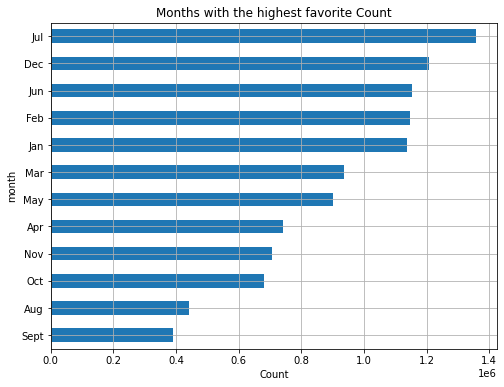

In [50]:
## Visulaizing the monthn with the highest retweet counts using barchart
plt.figure(figsize=[8,6])
bymonth.sum()['favorite_count'].sort_values().plot(kind ='barh', title= "Months with the highest favorite Count", grid=True)
plt.xlabel('Count');

**Interpretation**:As shown in the plot above, the WeRateDogs tweet gathered the highest number of favorite count in month July, followed by June contrary to what was observed for the retweet counts. However, the least represented month for month retweet and favorite counts is August

### Insight #2: Top 10 dogs with highest total ratings and retweet 

### Define: To obtain the Top 10 dogs with hihest total ratings and retweet using a frequency table

In [51]:
## Selecting the needed columns
twitter_ratings_counts = twitter_archive_master[['name','rating_numerator', 'rating_denominator','retweet_count']]

In [52]:
##Diving the numerator ratings with denominator ratings to obtain the actual ratings
twitter_ratings_counts['Ratings']= (twitter_archive_master['rating_numerator']/twitter_archive_master['rating_denominator'])
twitter_ratings_counts.head()

<ipython-input-52-f24c8faafa76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_ratings_counts['Ratings']= (twitter_archive_master['rating_numerator']/twitter_archive_master['rating_denominator'])


,name,rating_numerator,rating_denominator,retweet_count,Ratings
0,Phineas,11.0,10.0,7003.0,1.1
1,Tilly,11.0,10.0,5301.0,1.1
2,Archie,11.0,10.0,3478.0,1.1
3,Darla,11.0,10.0,7224.0,1.1
4,Franklin,11.0,10.0,7757.0,1.1


In [53]:
## Creating a group by name
byname = twitter_ratings_counts.groupby('name')

In [54]:
## Frequency table based on the group by aggregate showing the dog with highest ratings and retweet count
count=byname.sum()[['Ratings', 'retweet_count']].sort_values(by = ['Ratings','retweet_count'],ascending=False).head(10)
count.style.highlight_max()

,Ratings,retweet_count
name,,
Charlie,11.900000,21916.000000
Lucy,10.700000,23799.000000
Cooper,10.700000,15032.000000
Oliver,10.600000,15582.000000
Tucker,9.700000,15669.000000
Penny,9.300000,25492.000000
Winston,8.200000,17259.000000
Sadie,8.100000,10513.000000
Daisy,7.500000,13915.000000


**Interpretation**:The analysis in the table above shows the rating and retweet counts by dog name. Dogs with no specific names had the highest rating and retweet count. Dogs named ARCHIE out the dogs with designated names had a rating of 55 and a total retweet count of 32039.

### Insight #3

#### Define: To obtain the retweet counts based on dog stages 

In [56]:
## Selecting dog stages without the None entries
dog_stages = twitter_archive_master[~(twitter_archive_master['stage']=='None')]

In [57]:
##Perfroming a groupby based on the dog stages
bystage = dog_stages.groupby('stage')

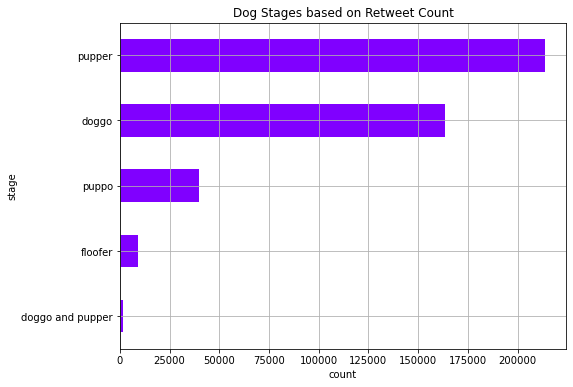

In [58]:
## Visualizing the dog stages based on the number of retweet counts using barchart
plt.figure(figsize=(8,6))
bystage.sum()['retweet_count'].sort_values().plot(kind ='barh', title= 'Dog Stages based on Retweet Count',
                                                 grid= 'darkgrid', cmap='rainbow')
plt.xlabel('count');

**Interpretation**: The analysis in the chart above shows the retweet counts by dog stages. Dogs stages like pupper,doggo and puppo had the highest retweet count respectively.